<a href="https://colab.research.google.com/github/FabiBarbos/Churn/blob/main/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Dataset_teste_Just_BI.csv',sep=';')

In [5]:
print(df.head())

   customer_id customer_acquisition_channel  year week  net_revenue  \
0       206461               Paid Marketing  2014  W09           71   
1       462640               Paid Marketing  2015  W25           28   
2       666461                     Referral  2015  W50           40   
3       183202                     Referral  2013  W42           18   
4       410993                     Referral  2014  W29            0   

   gross_revenue  boxes  
0             71      2  
1             56      1  
2             40      1  
3             37      1  
4             37      1  


In [6]:
print(df.isnull().any())

customer_id                     False
customer_acquisition_channel    False
year                            False
week                            False
net_revenue                     False
gross_revenue                   False
boxes                           False
dtype: bool


In [7]:
print(df.isnull().sum())

customer_id                     0
customer_acquisition_channel    0
year                            0
week                            0
net_revenue                     0
gross_revenue                   0
boxes                           0
dtype: int64


In [8]:
print(df.dtypes)

customer_id                      int64
customer_acquisition_channel    object
year                             int64
week                            object
net_revenue                      int64
gross_revenue                    int64
boxes                            int64
dtype: object


In [10]:
sales_by_year = df.groupby('year').sum()

<ipython-input-10-86dc60229ef9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_year = df.groupby('year').sum()


In [14]:
results = df.groupby('year').agg({'gross_revenue': 'sum', 'net_revenue': 'sum', 'boxes': 'sum'})

In [15]:
print(results)

      gross_revenue  net_revenue   boxes
year                                    
2013        6134328      5295828  156289
2014       11505225     10161460  291647
2015       12019567     10611613  292778


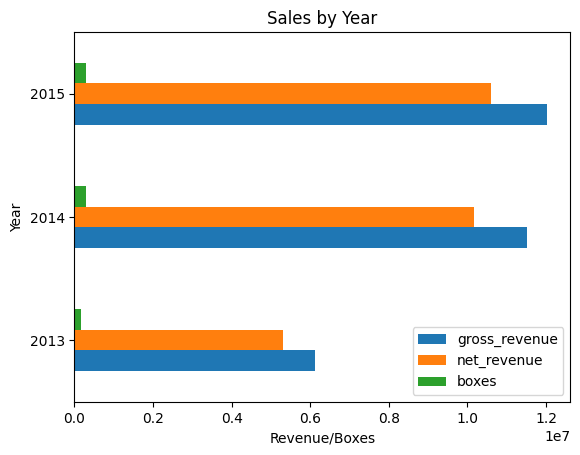

In [12]:
import matplotlib.pyplot as plt

sales_by_year.plot(kind='barh', y=['gross_revenue', 'net_revenue', 'boxes'])
plt.xlabel('Revenue/Boxes')
plt.ylabel('Year')
plt.title('Sales by Year')
plt.legend(loc='best')
plt.show()

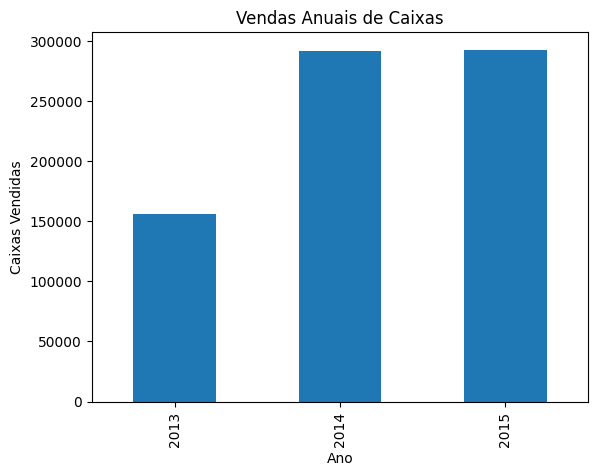

In [36]:
# Agrupar os dados por ano e calcular a soma das caixas vendidas
results_boxes = df.groupby('year')['boxes'].sum()

# Criar o gráfico de barras
results_boxes.plot(kind='bar')

# Personalizar o gráfico
plt.xlabel('Ano')
plt.ylabel('Caixas Vendidas')
plt.title('Vendas Anuais de Caixas')

# Exibir o gráfico
plt.show()

In [20]:
# Calcular o Ticket Médio
df['Ticket_Medio'] = df['gross_revenue'] / df['boxes']


In [21]:
# Filtrar dados para 2013 e 2015
df_2013 = df[df['year'] == 2013]
df_2015 = df[df['year'] == 2015]

In [22]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2013
channel_2013 = df_2013.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [23]:
# Encontrar o canal de aquisição de clientes com o maior Ticket Médio em 2015
channel_2015 = df_2015.groupby('customer_acquisition_channel')['Ticket_Medio'].mean().idxmax()

In [24]:
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2013:", channel_2013)
print("Canal de Aquisição de Clientes com maior Ticket Médio em 2015:", channel_2015)

Canal de Aquisição de Clientes com maior Ticket Médio em 2013: Paid Marketing
Canal de Aquisição de Clientes com maior Ticket Médio em 2015: Paid Marketing


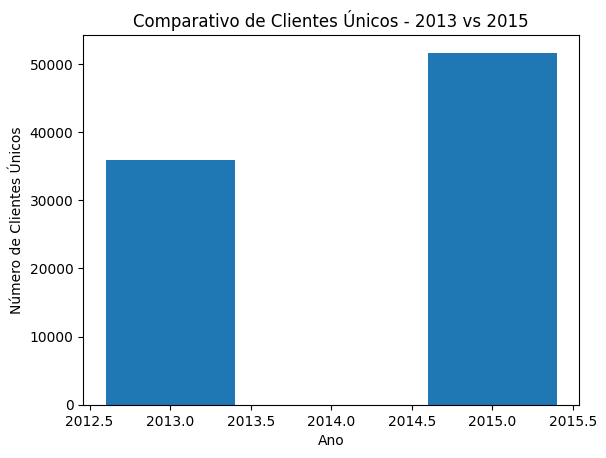

In [39]:
# Obter o número de clientes únicos por ano
clientes_unicos_2013 = df_2013['customer_id'].nunique()
clientes_unicos_2015 = df_2015['customer_id'].nunique()

# Criar o gráfico de barras comparativo
anos = [2013, 2015]
clientes_unicos = [clientes_unicos_2013, clientes_unicos_2015]

plt.bar(anos, clientes_unicos)
plt.xlabel('Ano')
plt.ylabel('Número de Clientes Únicos')
plt.title('Comparativo de Clientes Únicos - 2013 vs 2015')

# Exibir o gráfico
plt.show()

Para incrementar as análises em relação a resultados de vendas e análises sobre os clientes, alguns dados complementares que podem ser importantes incluem:

Dados Demográficos dos Clientes: Informações como idade, gênero, localização geográfica, nível de renda e estado civil dos clientes podem ajudar a segmentar e entender melhor o perfil dos consumidores. Isso pode ser útil para direcionar estratégias de marketing e oferecer produtos e serviços mais adequados às diferentes necessidades dos clientes.

Dados de Comportamento do Cliente: Coletar informações sobre o comportamento dos clientes, como histórico de compras, frequência de compra, produtos mais comprados, canais de compra preferidos e hábitos de consumo, pode fornecer insights valiosos para personalizar ofertas, melhorar a experiência do cliente e identificar oportunidades de venda cruzada ou venda adicional.

Dados de Satisfação do Cliente: Medir a satisfação do cliente por meio de pesquisas ou avaliações pós-compra pode fornecer informações sobre a qualidade do produto, atendimento ao cliente e experiência geral de compra. Esses dados ajudam a identificar pontos fortes e fracos do negócio, bem como áreas que podem precisar de melhoria.

Dados de Campanhas de Marketing: Ao acompanhar e analisar dados de campanhas de marketing, como taxas de abertura de e-mails, cliques em anúncios, conversões e retorno sobre o investimento (ROI), é possível avaliar a eficácia das estratégias de marketing e ajustá-las conforme necessário.

Dados de Preços e Promoções: Acompanhar os dados de preços e promoções, como descontos oferecidos, datas de promoção, impacto nas vendas e preferências dos clientes, pode ajudar a otimizar a estratégia de precificação e promocional, maximizando os resultados de vendas.

Dados de Feedback dos Clientes: Ouvir o feedback direto dos clientes por meio de canais de comunicação, como atendimento ao cliente, redes sociais ou avaliações online, pode fornecer insights valiosos sobre a satisfação do cliente, problemas enfrentados e oportunidades de melhoria.

Esses são apenas alguns exemplos de dados complementares que podem enriquecer as análises de vendas e análises sobre os clientes. A escolha dos dados depende das necessidades e objetivos específicos da empresa, além da disponibilidade e capacidade de coleta dos dados.

<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

Se você já conhece bem o Colab, confira este vídeo para saber mais sobre as tabelas interativas, a visualização do histórico de código executado e o Palette de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  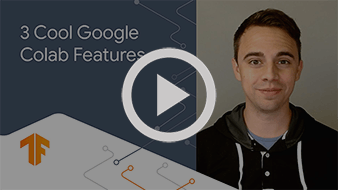
  </a>
</center>

<div class="markdown-google-sans">
  <h2>O que é o Colab?</h2>
</div>

O Colab, ou "Colaboratory", permite escrever e executar Python no navegador e conta com o seguinte: 
- Nenhuma configuração necessária
- Acesso a GPUs sem custo financeiro
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

<div class="markdown-google-sans">

## <strong>Vamos começar</strong>
</div>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Para executar o código na célula acima, clique nela e depois pressione o botão Play à esquerda do código ou use o atalho do teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis definidas em uma célula podem ser usadas mais tarde em outras células:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Os notebooks do Colab permitem combinar <strong>código executável</strong> e <strong>rich text</strong> em um só documento, além de <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando você cria seus próprios notebooks do Colab, eles são armazenados na sua conta do Google Drive. É possível compartilhar os notebooks do Colab facilmente com colegas de trabalho ou amigos e permitir que eles façam comentários ou até editem o documento. Para saber mais, consulte a <a href="/notebooks/basic_features_overview.ipynb">Visão Geral do Colab</a>. Para criar um novo notebook do Colab, use o menu Arquivo acima ou acesse o seguinte: <a href="http://colab.research.google.com#create=true">criar um novo notebook do Colab</a>.

Os notebooks do Colab são notebooks do Jupyter hospedados no Colab. Para saber mais sobre o projeto Jupyter, acesse <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciência de dados
</div>

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

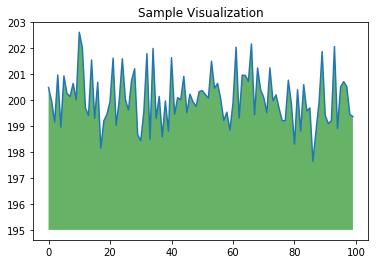

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Começar a usar o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para ver notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Como trabalhar com Notebooks no Colab

</div>

- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Como trabalhar com dados
</div>

- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Começar a usar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de machine learning

<div>

Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: use o kit de ferramentas para IA conversacional do Nvidia NeMo para trocar uma voz em um fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
